#  Week 10, More with Altair!

We'll build more interactive elements with Altair.

Let's work through a few examples:

1. With the buildings dataset
1. With the corgis dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt # just in case

## 1. Altair with the buildings dataset

Ok!  So one dataset we know has some cleaning that needs to happen is the buildings dataset, so let's read this in and take a look to remember:

In [2]:
data_url = 'https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/building_inventory.csv'
buildings = pd.read_csv(data_url)

In [3]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


Let's make a quick plot with matplotlib to see what might need to be cleaned:

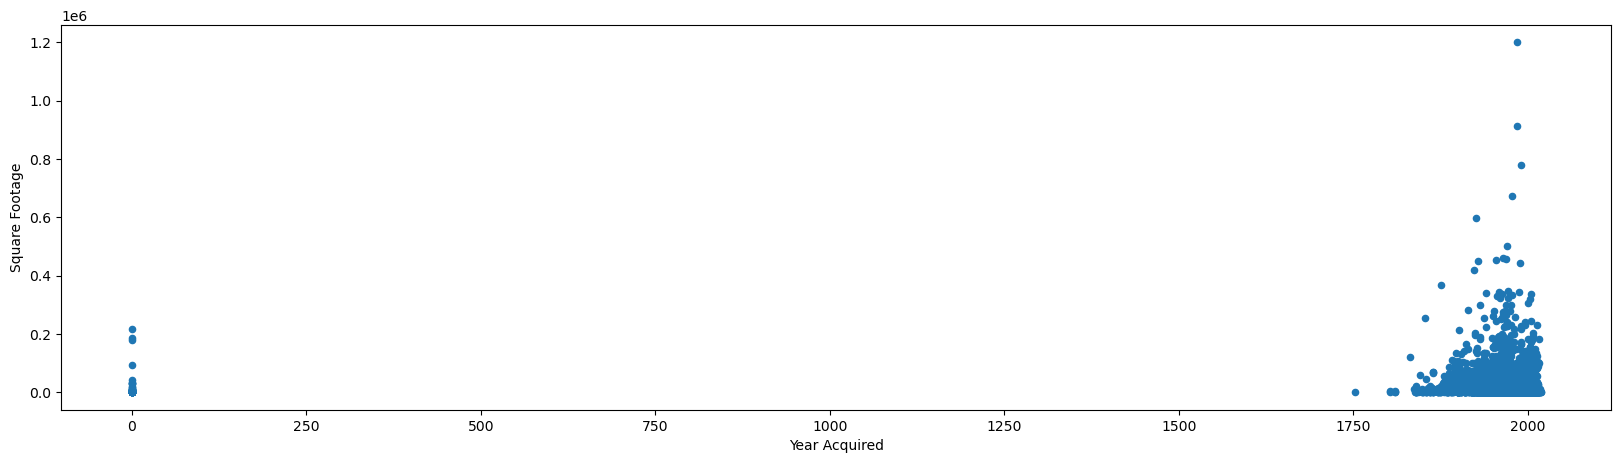

In [4]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
plt.show()

So, if we remember to when we first saw this dataset, we had a bunch of zeros that we decided we should tag as missing data with an NaN.  Let's clean this dataframe:

In [5]:
buildings.loc[buildings['Year Acquired'] == 0,'Year Acquired'] = np.nan
buildings.loc[buildings['Square Footage'] == 0,'Square Footage'] = np.nan

And then re-make this plot:

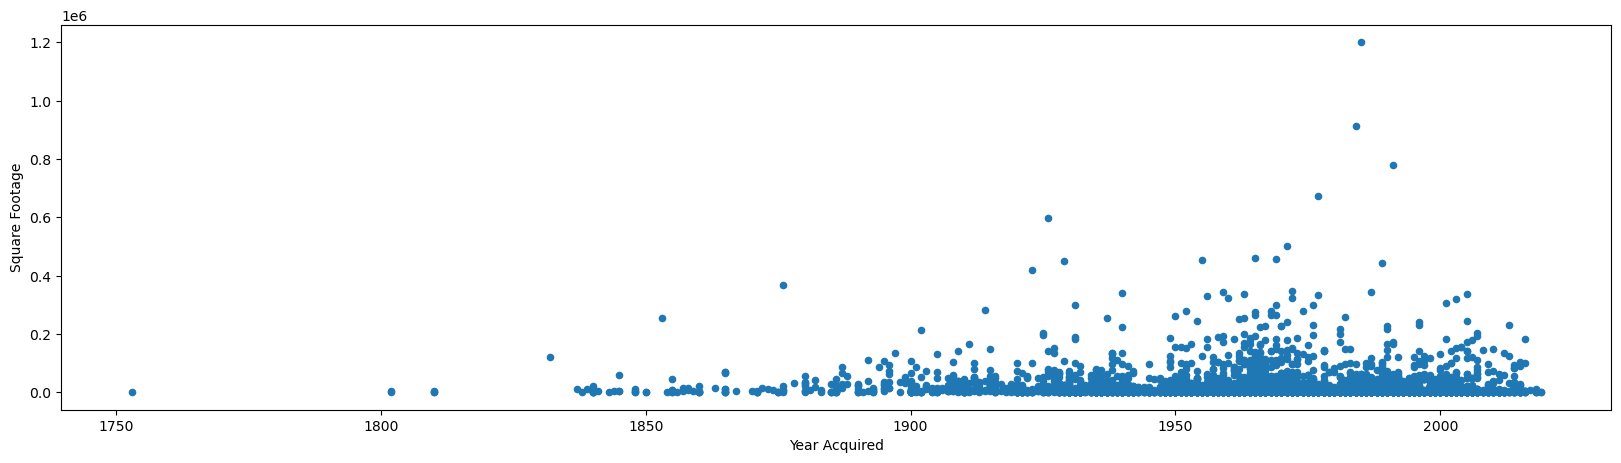

In [6]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
plt.show()

Hey that looks much better!  Though, we probably want a log-scale on the y-axis, just to be safe:

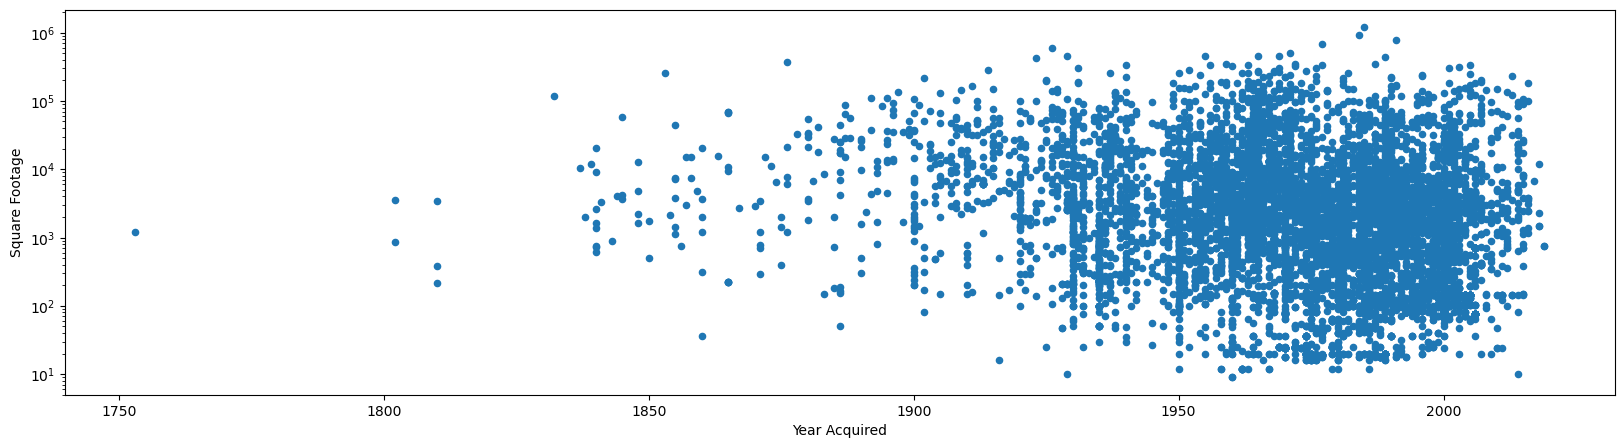

In [7]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter',logy=True)
plt.show()

Nice.  

Ok, now that we have our data cleaned, we can further transform our data by creating a statistics dataframe out of our data:

In [8]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [9]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


And make some plots with this transformed dataset:

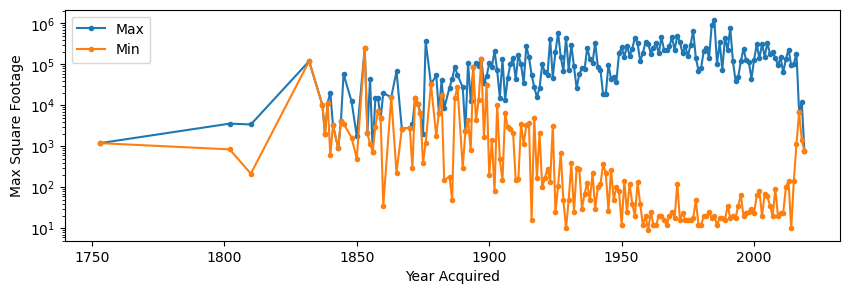

In [10]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
ax.set_yscale('log')
ax.legend() # placing the labels in a legend that i added to the plots
plt.show()

So, this is a case were we not have a very different dataframe from were we started.  Its not that we necessarily *can't* make this kind of plot using the original dataframe with vega-lite, but if we are already doing analysis and transforms in Python with our data, we can then use Altair to export the results of this analysis to share with others.  So, let's get to it! First, let's re-make this plot with Altair:

In [11]:
# first, just one line
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:O"),
    #alt.X('max:Q'),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

https://altair-viz.github.io/user_guide/data.html#including-index-data

In [12]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:Q"),
    #alt.X('max:Q'),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [13]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [14]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [15]:
stats.index = pd.to_datetime(stats.index.astype('int'), format='%Y')

In [16]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753-01-01,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832-01-01,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837-01-01,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015-01-01,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016-01-01,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017-01-01,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [17]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

Now, let's add in the min line, to do that we need to make a layered plot:

In [18]:
#https://github.com/altair-viz/altair/issues/968
# base = alt.Chart(df.reset_index()).encode(x='x')

# alt.layer(
#     base.mark_line(color='blue').encode(y='squared'),
#     base.mark_line(color='red').encode(y='cubed')
# )

In [19]:
#https://github.com/altair-viz/altair/issues/968
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='red').encode(y='min:Q')
)
lines

alt.LayerChart(...)

Let's set a log scale for each of these:

In [20]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
             ),
    lines.mark_line(color='red').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
)
lines

alt.LayerChart(...)

Before moving on, we can make this ["easily" interactive with simple pans/zooms](https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html):

In [21]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
             ),
    lines.mark_line(color='red').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
).interactive()
lines

alt.LayerChart(...)

### A few more things

#### 1. Adding a mouse over for both lines (skip this one)

Porting from: https://altair-viz.github.io/gallery/multiline_tooltip.html#multi-line-tooltip

In [24]:
stats_min = stats[['min','max']]
stats_min.head()

,min,max
Year Acquired,,
1753-01-01,1200.0,1200.0
1802-01-01,846.0,3594.0
1810-01-01,216.0,3432.0
1832-01-01,120000.0,120000.0
1837-01-01,10302.0,10302.0


In [25]:
# easier for multi-line plots
source = stats_min.reset_index().melt('Year Acquired', 
                                      var_name='Statistic', value_name='stat')
source.head()

,Year Acquired,Statistic,stat
0,1753-01-01,min,1200.0
1,1802-01-01,min,846.0
2,1810-01-01,min,216.0
3,1832-01-01,min,120000.0
4,1837-01-01,min,10302.0


In [26]:
# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [27]:
alt.selection_point?

Signature:
alt.selection_point(
    name: 'str | None' = None,
    value: 'Optional[Any]' = Undefined,
    bind: 'Optional[Binding | str]' = Undefined,
    empty: 'Optional[bool]' = Undefined,
    expr: 'Optional[Expr]' = Undefined,
    encodings: 'Optional[list[SingleDefUnitChannel_T]]' = Undefined,
    fields: 'Optional[list[str]]' = Undefined,
    on: 'Optional[str]' = Undefined,
    clear: 'Optional[str | bool]' = Undefined,
    resolve: 'Optional[SelectionResolution_T]' = Undefined,
    toggle: 'Optional[str | bool]' = Undefined,
    nearest: 'Optional[bool]' = Undefined,
    **kwds: 'Any',
) -> 'Parameter'
Docstring:
Create a point selection parameter. Selection parameters define data queries that are driven by direct manipulation from user input (e.g., mouse clicks or drags). Point selection parameters are used to select multiple discrete data values; the first value is selected on click and additional values toggled on shift-click. To select a continuous range of data values on

In [28]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection_point(nearest=True, on='mousemove',
                        fields=['Year Acquired'], empty=False)

# The basic line
# given that we want to be accurate to the data, we probably don't want to interpolate
line = alt.Chart(source).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year Acquired:T',
    opacity=alt.value(0),
).add_params(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'stat:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year Acquired:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)

#### END SKIP

#### 2. Deciding what statistic to plot (do this one)

Porting from: https://altair-viz.github.io/user_guide/interactions.html#binding-adding-data-driven-inputs

With update from "mouseover" to "mousemove": https://github.com/altair-viz/altair/issues/3257 

There are other ways to plot multi-line plots besides layers that add more functionality to interactive elements.  Let's look at a quick example of the `.melt` Pandas operation:

In [22]:
stats_min = stats[['min','max']]
stats_min.head()

,min,max
Year Acquired,,
1753-01-01,1200.0,1200.0
1802-01-01,846.0,3594.0
1810-01-01,216.0,3432.0
1832-01-01,120000.0,120000.0
1837-01-01,10302.0,10302.0


Now let's "melt" this -- by turning the set of columns into combinations of the statistic (min/max), value of the statistic (numerical value of min/max column) for each `Year Acquired`.

For this, we'll "melt" our dataframe on the `Year Acquired` column:

In [23]:
# easier for multi-line plots
source = stats_min.reset_index().melt('Year Acquired', 
                                      var_name='Statistic', value_name='stat')
source.head()

,Year Acquired,Statistic,stat
0,1753-01-01,min,1200.0
1,1802-01-01,min,846.0
2,1810-01-01,min,216.0
3,1832-01-01,min,120000.0
4,1837-01-01,min,10302.0


Now we have a set of each of min/max for each year.  It turns out this is much easier to plot multi-line plots with using Altair:

In [24]:
# The basic line
line = alt.Chart(source).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

Now that we have this small example, let's re-do this with the full `stats` dataframe:

In [25]:
source2 = stats.reset_index().melt('Year Acquired', 
                                      var_name='Statistic', value_name='stat')


In [26]:
source2.head()

,Year Acquired,Statistic,stat
0,1753-01-01,count,1.0
1,1802-01-01,count,2.0
2,1810-01-01,count,3.0
3,1832-01-01,count,1.0
4,1837-01-01,count,1.0


In [27]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

We see the above has some issues -- could be due to our scale choice, let's try w/o the log scale:

In [28]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q'),#,scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

So, we probably have some zeros to attend to:

In [29]:
source2['stat'].min()

0.0

In [30]:
source2.loc[source2['stat'] == 0,'stat'] = np.nan

In [31]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [32]:
input_dropdown = alt.binding_select(options=['50%','mean','min','max','std'], 
                                    name='Statistic')
selection = alt.selection_point(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection,
                    alt.Color('Statistic:N', legend=None),
                    alt.value('lightgray'))

line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color
).add_params(
    selection
)
line

alt.Chart(...)

A little hard to see some of those lines when they are "behind" others -- we can also mess with our opacity as well:

In [33]:
input_dropdown = alt.binding_select(options=['50%','mean','min','max','std'], 
                                    name='Statistic')
selection = alt.selection_point(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection,
                    alt.Color('Statistic:N', legend=None),
                    alt.value('lightgray'))
opacity = alt.condition(selection, alt.value(1.0), alt.value(0.25))

line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color,
    opacity=opacity
).add_params(
    selection
)
line

alt.Chart(...)

## 2. Corgis Dataset examples (we often times don't get to this, at least on the first day)

Let's start by reading in this dataset and taking a look -- we'll start with the number of corgis born over time:

In [35]:
corgs = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/corgs_per_country_over_time_columns_2020.csv')

In [36]:
corgs.head()

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, this shows the number of corgis born over time in different countries.  The easiest plot we can think of is probably a line chart of each country over time.  First, let's start with the United States:

In [37]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:Q'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

Here again, we probably want to specify that we have time units:

In [38]:
corgs['Years'] = pd.to_datetime(corgs['Years'].astype('int'), format='%Y')

In [39]:
corgs

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917-01-01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016-01-01,229,0,217,2,0,54,55,28,2,...,8,3,0,9,0,0,0,27,17,72
100,2017-01-01,213,0,260,2,1,28,60,10,4,...,4,3,0,0,2,0,0,8,25,101
101,2018-01-01,198,0,329,0,3,42,25,5,2,...,6,3,0,0,0,0,0,16,12,56
102,2019-01-01,118,0,189,0,0,30,62,1,2,...,0,0,0,0,0,0,0,16,12,51


In [40]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:T'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

That looks better!  To make multiple lines for each country, we want to probably use the `melt` operation we did before. To do that, we need to make years the index:

In [41]:
corgs = corgs.set_index('Years')
corgs.head()

,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,South Africa,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
Years,,,,,,,,,,,,,,,,,,,,,
1917-01-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can "melt" like before:

In [42]:
corg_source = corgs.reset_index().melt('Years', 
                                      var_name='Country', value_name='country')

In [43]:
corg_source.head()

,Years,Country,country
0,1917-01-01,United States,0
1,1918-01-01,United States,0
2,1919-01-01,United States,0
3,1920-01-01,United States,0
4,1921-01-01,United States,0


Now, let's try again with our multi-line plot:

In [44]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q'),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Since there is a large range of corgis born, we might try a log-scale on the y-axis:

In [45]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Here we see that there is an issue -- this is probably because there are zeros in our dataset:

In [46]:
corg_source['country'].min()

0

Potentially, we can "clean" these by setting any zeros to NaN's, however in this case those 0's are meaningful -- they are telling us that a particular country has no corgis born in that year!  Instead, we have a few different options.  One thing we can do [is apply a](https://stackoverflow.com/questions/58032074/why-is-altair-returning-an-empty-chart-when-using-log-scale) [filter opperation](https://altair-viz.github.io/user_guide/transform/filter.html#filter-transform) on our data:

In [47]:
linecorg = alt.Chart(corg_source).transform_filter(
    alt.datum.country > 0
).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

This doesn't really get to our issue though -- we are just filtering out those zero years/countries.  In this case, instead of filtering, we probably want to use a symmetric log instead of a log for our scale;

In [48]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='symlog')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Even with this though, we have sort of a messy plot -- even if we allowed for selections (like with the buildings dataset above) we still have many lines that "fall off" our legend which is not helpful.

Since this is data in different countries, we could think that maybe a good idea would be some kind of map!  Check out the "extra" prep notebook and video walk through for how this is done.